# What makes a great wine?

For this project, I am going to analyze [a wine rating dataset from kaggle](https://www.kaggle.com/zynicide/wine-reviews) in order to find out, what makes a great wine.

## Retrieving the data

It is quite possible, that there are no data files in `../data` just yet. Happily, we can use [kaggle API](https://github.com/Kaggle/kaggle-api) to retrieve them!

In [1]:
from pathlib import Path
import subprocess

datadir = Path("../data")
zipfile = datadir / "wine-reviews.zip"
datafile = datadir / "winemag-data-130k-v2.csv"

if not datafile.exists():
    # Download the data
    output = subprocess.run(["kaggle", "datasets", "download", "zynicide/wine-reviews", "-p", str(datadir)], capture_output=True)
    print(output.stdout)
    
    # Unzip the data
    subprocess.run(["unzip", str(zipfile)], cwd=datadir)
else:
    print("Data is already downloaded :)")

Data is already downloaded :)


## Reading the data

Okay, so now that the data is read, we can start by reading it into a pandas dataframe and start exploring!

In [2]:
import pandas as pd

df = pd.read_csv(datafile)

df.head(50)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Exploration

In [3]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Looks like there are some easily understandable columns, such as `country`, `points`, `price` and `title`. Also, `variety` and `winery` may offer something interesting too.

To find the answer for the question "What makes a great wine?", we should start by having a look at the best and the worst wines.

In [4]:
df[df.points > 95].sort_values(by='points', ascending=False).head(50)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
111756,111756,France,"A hugely powerful wine, full of dark, brooding...",NaN,100,359.0,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases
123545,123545,US,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse
39286,39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,NaN,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
118058,118058,US,This wine dazzles with perfection. Sourced fro...,La Muse,100,450.0,California,Sonoma County,Sonoma,NaN,NaN,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité
45781,45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
45798,45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,Napa,NaN,NaN,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale
36528,36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug
122935,122935,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Roger Voss,@vossroger,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion
42197,42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha


In [5]:
df.sort_values(by='points', ascending=True).head(50)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
118056,118056,US,This wine has very little going on aromaticall...,Reserve,80,26.0,California,Livermore Valley,Central Coast,Virginie Boone,@vboone,3 Steves Winery 2008 Reserve Cabernet Sauvigno...,Cabernet Sauvignon,3 Steves Winery
35516,35516,US,"This Merlot has not fully ripened, with aromas...",NaN,80,20.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,James Wyatt 2013 Merlot (Horse Heaven Hills),Merlot,James Wyatt
11086,11086,France,Picture grandma standing over a pot of stewed ...,NaN,80,11.0,Languedoc-Roussillon,Fitou,NaN,Joe Czerwinski,@JoeCz,Mont Tauch 1998 Red (Fitou),Red Blend,Mont Tauch
11085,11085,France,A white this age should be fresh and crisp; th...,NaN,80,8.0,Southwest France,Bergerac,NaN,Joe Czerwinski,@JoeCz,Seigneurs de Bergerac 1999 White (Bergerac),White Blend,Seigneurs de Bergerac
102482,102482,US,"This wine is a medium cherry-red color, with s...",Cabernet Franc,80,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Tucannon 2014 Cabernet Franc Rosé (Columbia Va...,Rosé,Tucannon
102481,102481,US,"This wine has artificial, plastic-like aromas ...",Signature Series Mountain Cuvee,80,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2013 Signature Series Mount...,Cabernet Sauvignon,Kirkland Signature
102480,102480,Chile,This has overripe tropical-fruit aromas on the...,Gaucho Andino,80,7.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Aguirre 2014 Gaucho Andino Chardonnay (Maule V...,Chardonnay,Aguirre
90934,90934,Spain,"Mulchy and gaseous on the nose, this subsequen...",Royal,80,10.0,Northern Spain,Rioja,NaN,Michael Schachner,@wineschach,Bodegas Franco-Españolas 2010 Royal (Rioja),Tempranillo,Bodegas Franco-Españolas
90933,90933,Spain,Raisin and funky leather are the prime aromas ...,Valdemoreda,80,8.0,Northern Spain,Rioja,NaN,Michael Schachner,@wineschach,Bodegas del Mundo 2010 Valdemoreda (Rioja),Tempranillo,Bodegas del Mundo
118952,118952,Argentina,This smells distinctly of rubber and little el...,NaN,80,12.0,Other,Calchaquí Valley,NaN,Michael Schachner,@wineschach,Michel Torino 2014 Rosé (Calchaquí Valley),Rosé,Michel Torino


Hmm.. It sure looks like the worst wine in this dataset has 80 points. Suspicious, if you ask me. Let's see a plot:

<AxesSubplot:>

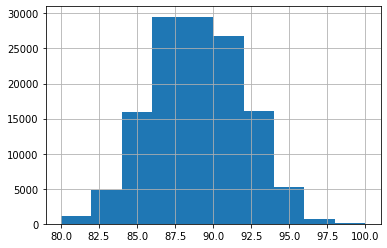

In [6]:
import matplotlib.pyplot as plt
df.points.hist()

Yup! The data ends at 80. Weirdly enough, it looks like it is normally distributed. This gives me confidence that the data from 0 to 80 was not brutally removed. I am just going to ignore this :)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'points'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

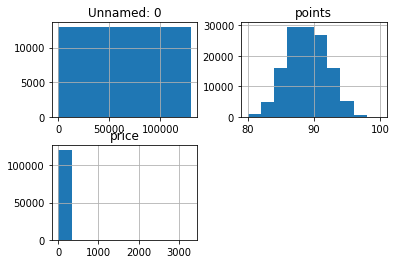

In [7]:
df.hist()

It seems that there is a unused index column in the data called "Unnamed: 0". We should remove that.

Also, it seems that price is quite heavily skewed.

country
US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
dtype: int64


<AxesSubplot:xlabel='country'>

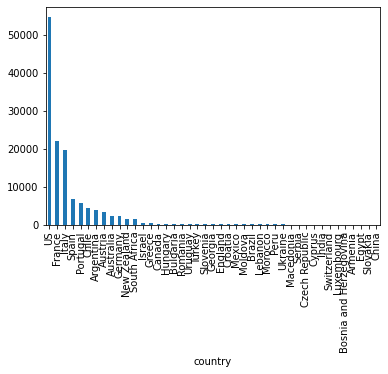

In [8]:
top_countries = df.groupby('country').size().sort_values(ascending=False)
print(top_countries.head(10))
top_countries.plot.bar()

From Finnish perspective, the US wines are hugely overrepresented in this dataset.

Let's see, how many unique and na values are there in the columns

In [9]:
df.describe(include='all').loc['unique', :]

Unnamed: 0                  NaN
country                      43
description              119955
designation               37979
points                      NaN
price                       NaN
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
Name: unique, dtype: object

In [10]:
df.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Let's try to see, if there are some differences between different countries at different prizes

<AxesSubplot:xlabel='price'>

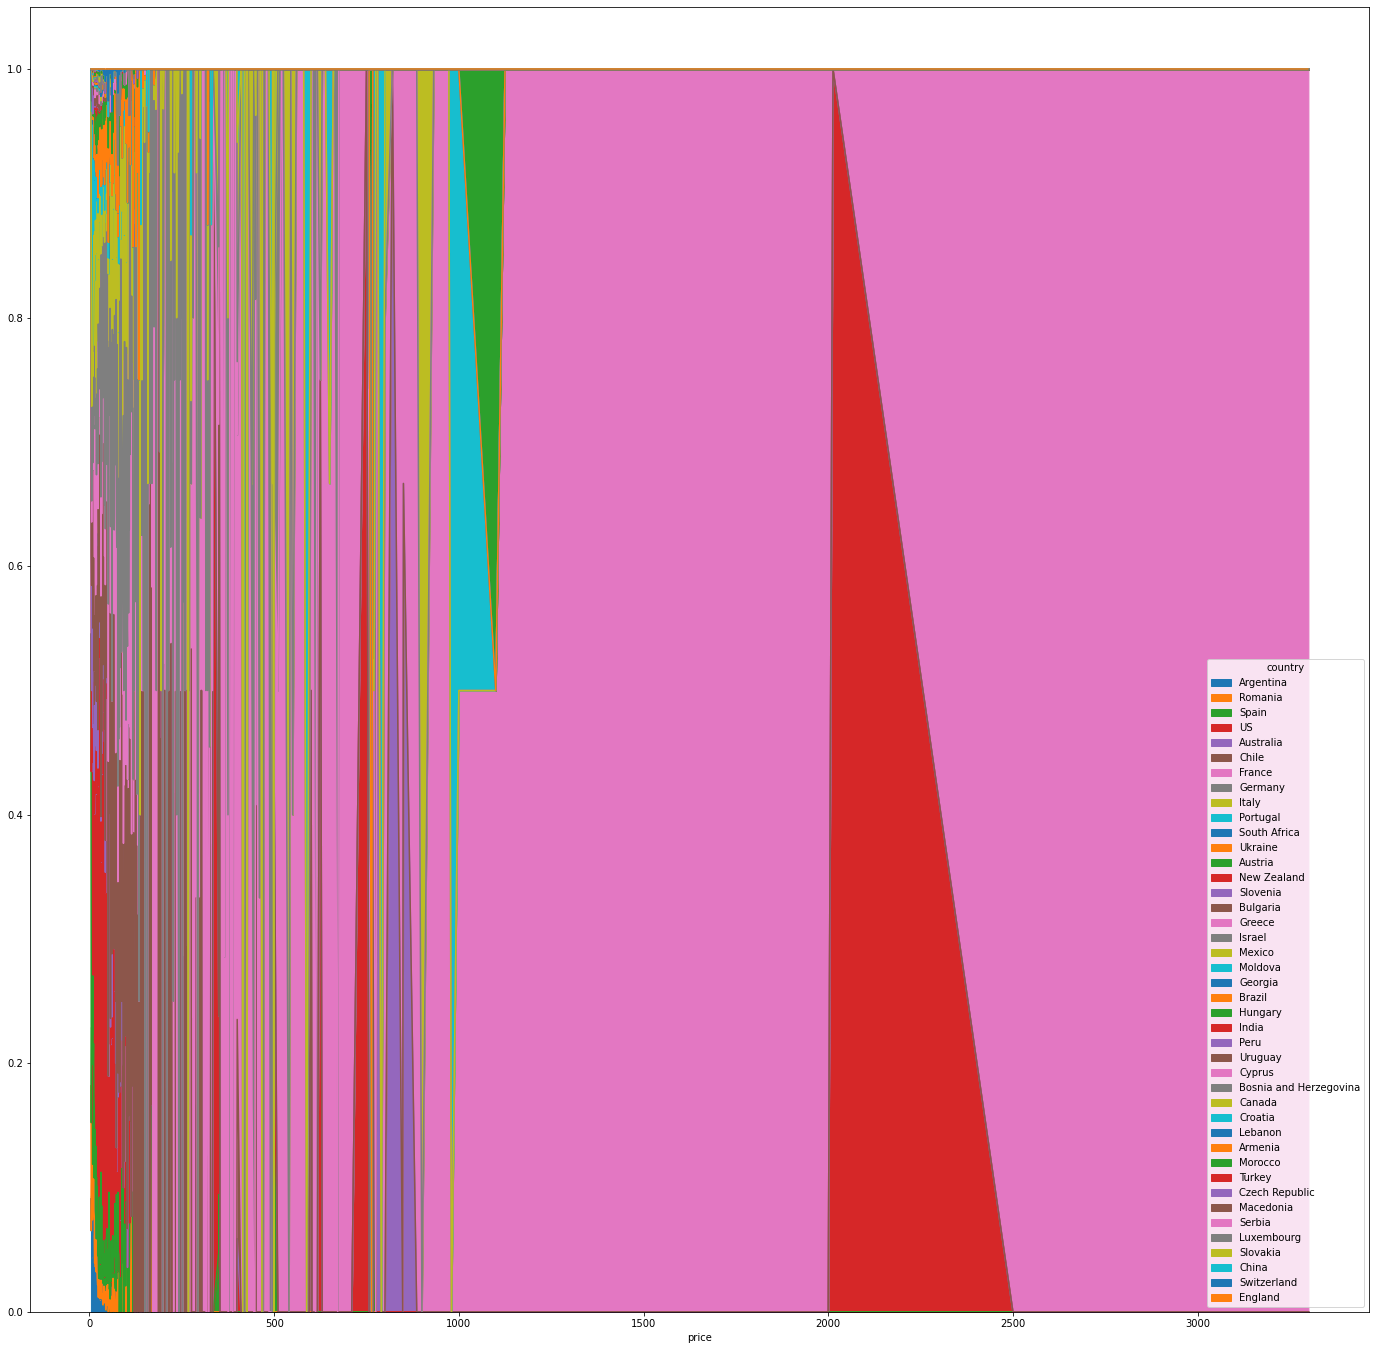

In [11]:
plot_df = df.groupby(['price', 'country']).size().unstack(level=1)
plot_df = plot_df.divide(plot_df.sum(axis=1), axis=0)
plot_df.plot.area(figsize=(24,24))

It seems that the priciest wine is made in France! 

<AxesSubplot:xlabel='points'>

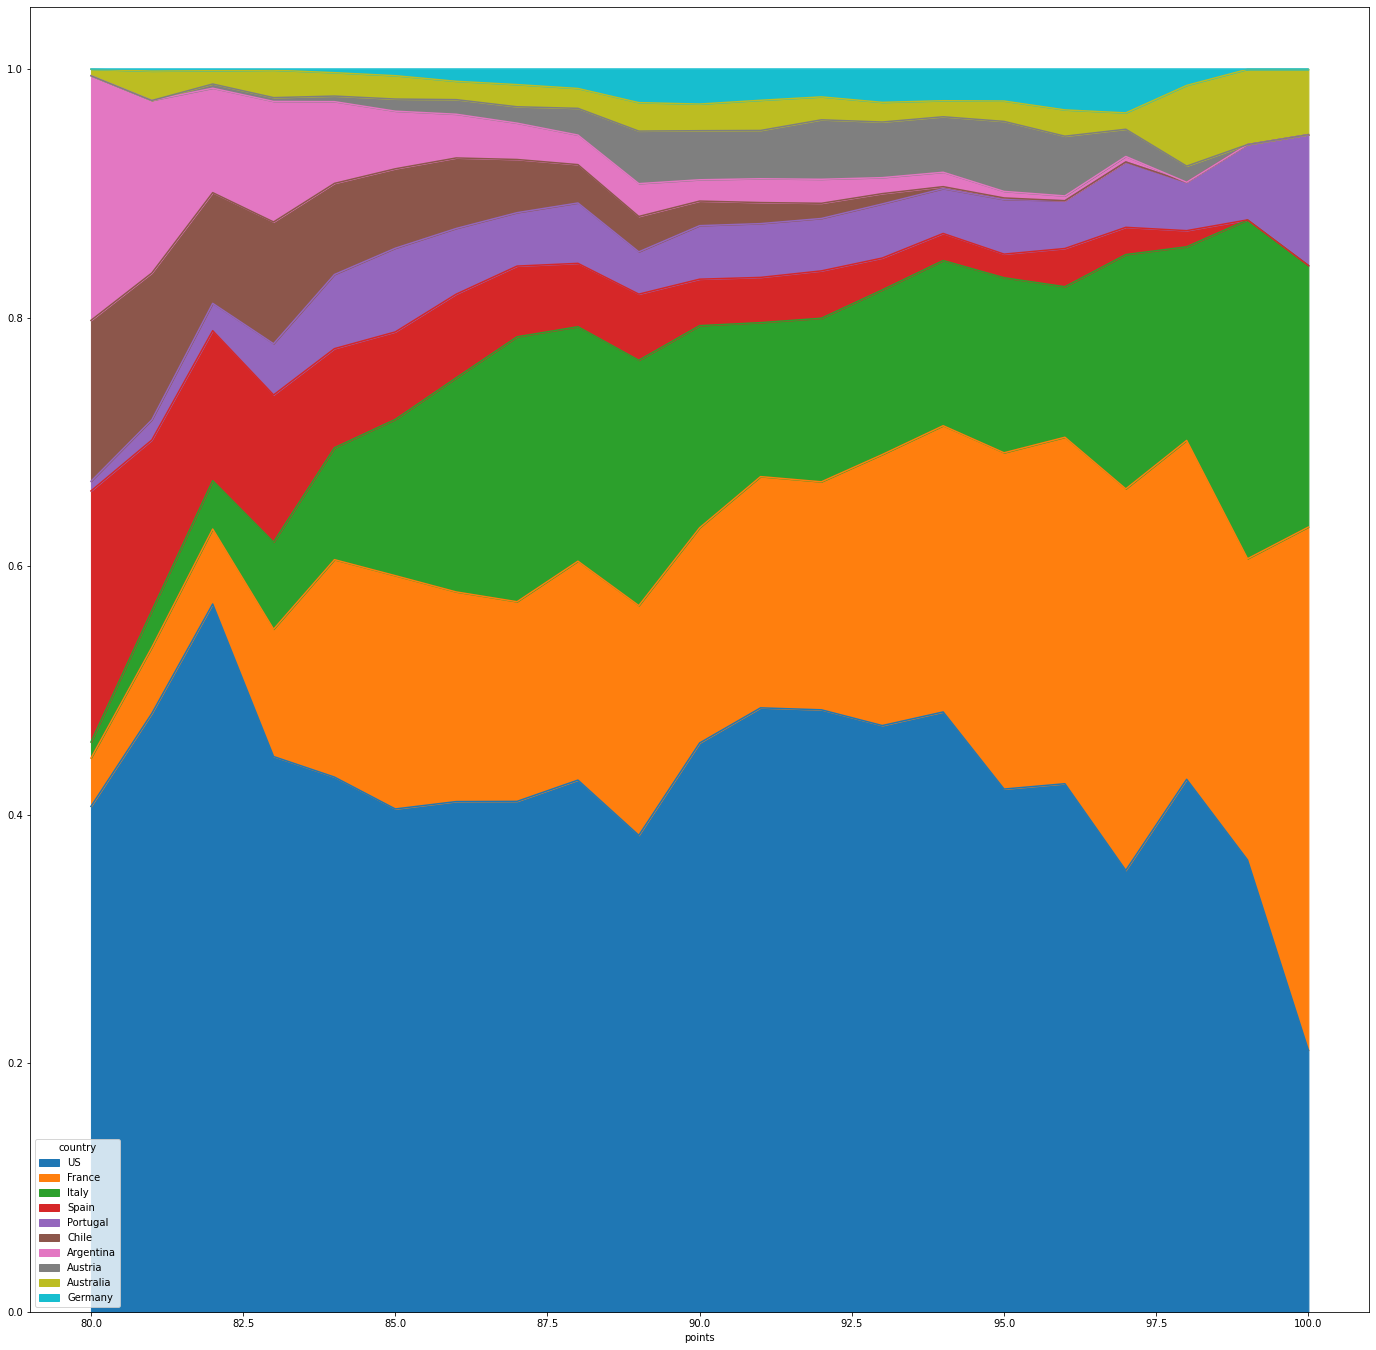

In [12]:
points_int = df.points.round(0).astype(int)
df_two = df.drop('points', axis=1)
df_two['points'] = points_int

# Filter countries for clarity. These are top 10
countries = ['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina', 'Austria', 'Australia', 'Germany']
plot_df = df_two.groupby(['points', 'country']).size().unstack(level=1)[countries]
plot_df = plot_df.divide(plot_df.sum(axis=1), axis=0)
plot_df.plot.area(figsize=(24,24))

To me this looks like that Spain, Chile and Argentina have a clear skew towards the lower end wines, whereas France, Italy, Portugal and Australia have better wines.
US does not have the absolute best wines (97,5-100 points), but it has a wide range of everything between 80-97,5.
Germany and Austria are odd ones out, because their wines are mostly represented in 87.5-97.5 area.

### Preprocessing

Let's remove the unneeded columns. In order to run regression we want to drop the columns, which are not easily one hot encoded (too many unique values). I will still keep `province` and `variety`, altough there are quite much unique values. I can remove them if needed.

Also, we will separate the dataset into y (points) and x (everything else).

In [13]:
# s for small
too_much_uniq = ["Unnamed: 0", "description", "designation", "region_1", "region_2", "title", "winery"]
not_related_to_wine = ["taster_name", "taster_twitter_handle"]
unneeded = too_much_uniq + not_related_to_wine
df_s = df.drop(unneeded, axis=1).dropna()

x = df_s.drop('points', axis=1)
y = df_s.points

### Encoding

In order to get rid of the categorical variables, we should encode them. I have used sklearn.OneHotEncoder before, so I think that is should do the trick.

In [14]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()

X = oh_enc.fit_transform(x)

In [15]:
print(X.shape)
print(y.shape)

(120915, 1545)
(120915,)


## Splitting into train and test

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)

## Training the model

I picked Support Vector Regression (SVR), by following the sklearn's brilliant image, which helps to choose the right estimator for given purpose. I wanted to predict, how good scores a wine could have, therefore we moved on to the Regression department of the graph. SGDRegressor needs lots of data, so we will try that, but it may be that it is not optimal. Lasso should be tested too. Maybe try SVM and AdaBoostRegressor too to have a broad scope of regressors :)![choosing the right estimator](https://scikit-learn.org/stable/_static/ml_map.png)

In [51]:
from sklearn.linear_model import Lasso, SGDRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
regs = [
            ('Lasso', Lasso()),
            ('SGDRegressor', SGDRegressor(penalty='l2')),
            ('LinearSVR', svm.LinearSVR()),
            ('AdaBoostRegressor', AdaBoostRegressor()),
       ]
for reg in regs:
    reg[1].fit(X_train, y_train)

In [50]:
for reg in regs:
    print(f"{reg[0]:<20}{reg[1].score(X_test, y_test):2f}")

Lasso               -0.000069
SGDRegressor        0.199376
LinearSVR           0.425042
AdaBoostRegressor   -0.014670


## Conclusion

Ha! I thought that the `AdaBoostRegressor` would win this (it always has in our school works). Maybe this is because of the sparsity of the data? I will have to see, if I can improve the data set somehow.

The regression should be tried with a smaller amount of features. Now, there's like a gazillion of them.